<a href="https://colab.research.google.com/github/karolinawegrzyn/effective_python/blob/master/lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Numpy

In [ ]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [ ]:
import random

def randomarray(n):
  return [random.random()+1 for i in range(n)]

def nprandomarray(n):
  return (np.random.rand(n)+1)

In [ ]:
%%timeit
randomarray(10000)

1.73 ms ± 472 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
nprandomarray(10000)

106 µs ± 1.64 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [ ]:
from math import sin, cos

def sumsincos(arr):
    return [sin(x)+cos(x) for x in arr]

def npsumsincos(arr):
    return np.sin(arr)+np.cos(arr)

In [ ]:
arr = nprandomarray(10000)

In [ ]:
%%timeit
sumsincos(arr)

4.14 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
npsumsincos(arr)

467 µs ± 74.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [ ]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

In [ ]:
def np_cube_sum(x):
    return np.power(x,3).sum()

def np_almost_variance(x):
    return np.power(x-x.mean(), 4).mean()

In [ ]:
arr = nprandomarray(10000)

In [ ]:
%%timeit
cube_sum(arr)

3.04 ms ± 96.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
almost_variance(arr)

7.04 ms ± 2.26 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
np_cube_sum(arr)

272 µs ± 5.32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
np_almost_variance(arr)

379 µs ± 6.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [ ]:
arr = np.arange(1, 11)
print(arr * arr.reshape(10, 1))

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**?

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [ ]:
def euclidean_distance():
  arr = np.random.rand(10, 5)
  return np.sum(arr**2, axis=1)

print(euclidean_distance())

[1.96992741 2.97333315 2.58143288 1.64018891 1.14886132 1.28322282
 2.28921604 0.81013423 1.67255676 1.22497094]


### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix}
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) =
\left [ \begin{matrix}
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [ ]:
def white(x):
  return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

print(white(np.arange(10).reshape(5, 2)))

[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn.

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a|
$$

np.

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [ ]:
def closest(x,A):
  return A[np.argmin(np.abs(x-A))]

print(closest(1.5, np.array([1,-4,3])) == 1)

True


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`).
Może Ci się przydać metoda `cumprod`.

In [ ]:
def poly(x,A):
  return np.sum(np.power(x, np.arange(len(A))) * A)

print(poly(2,[1,2,3]) == 17)

True


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

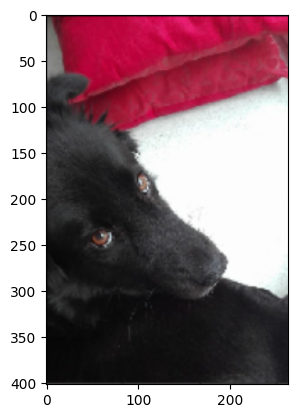

In [ ]:
img = mpimg.imread('images/doggo.png')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

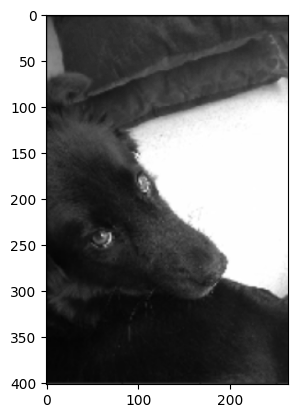

In [ ]:
img = mpimg.imread("sample_data/doggo.png")
gray_image = 0.2126 * img[:, :, 0] + 0.7152 * img[:, :, 1] + 0.0722 * img[:, :, 2]
plt.imshow(gray_image, cmap='gray')

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [ ]:
x1 = np.array([1, 2])
x2 = np.array([3, 4])
l = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).reshape(11,1)
interpolation = l * x1 + (1 - l) * x2
print(interpolation)

[[3.  4. ]
 [2.8 3.8]
 [2.6 3.6]
 [2.4 3.4]
 [2.2 3.2]
 [2.  3. ]
 [1.8 2.8]
 [1.6 2.6]
 [1.4 2.4]
 [1.2 2.2]
 [1.  2. ]]
